In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")
dataset.drop(["node"],inplace=True,axis=1)
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [3]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [4]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")
test=dataset.query("date.dt.year==2022")

In [5]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [6]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [7]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [8]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [9]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

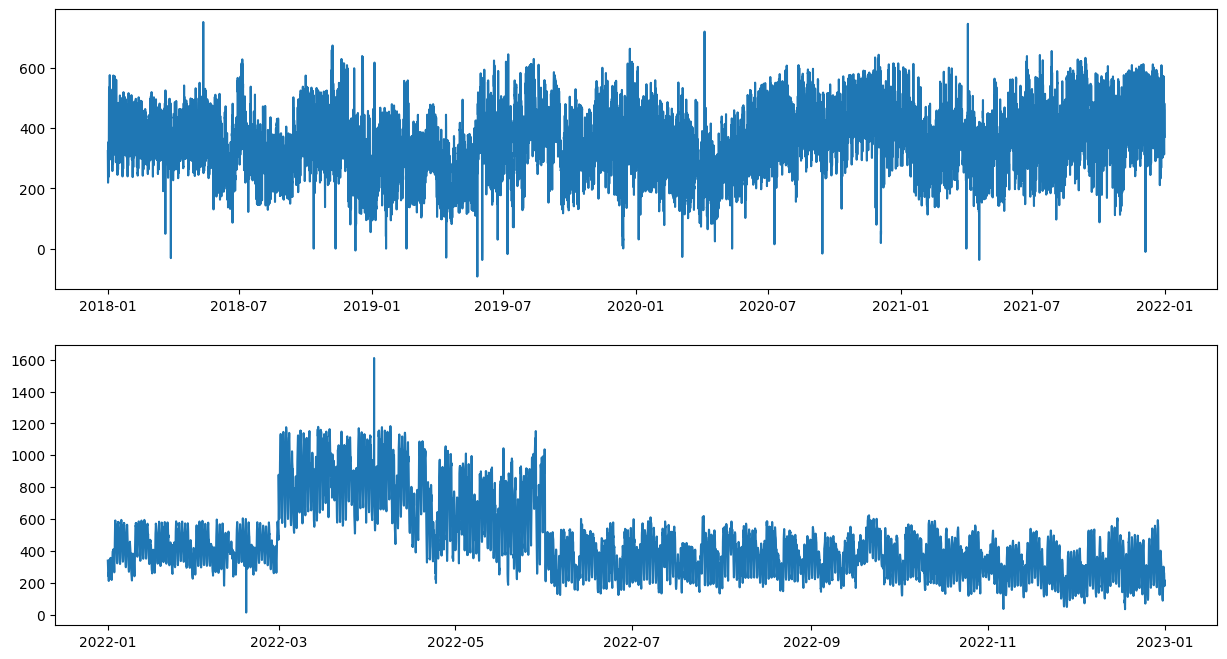

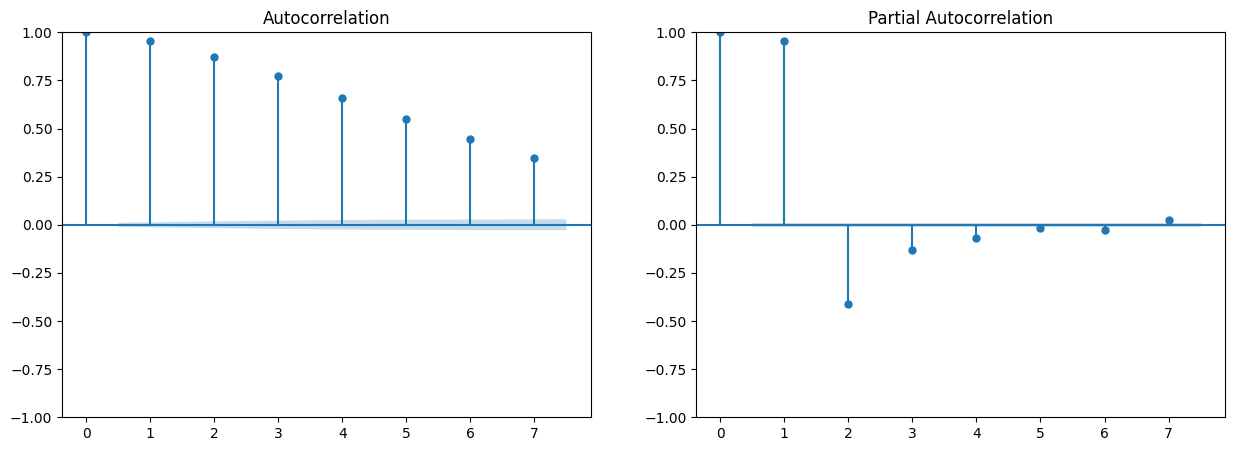

In [10]:
subestacion="CNAVIA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [11]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

In [12]:
data["year"]=data["date"].dt.year
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,323.805217,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,300.024568,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,292.703969,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,275.072969,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,256.985001,2018-01-01 04:00:00,1,4,1,2018


In [13]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys_cnavia.csv")

In [14]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_cnavia.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

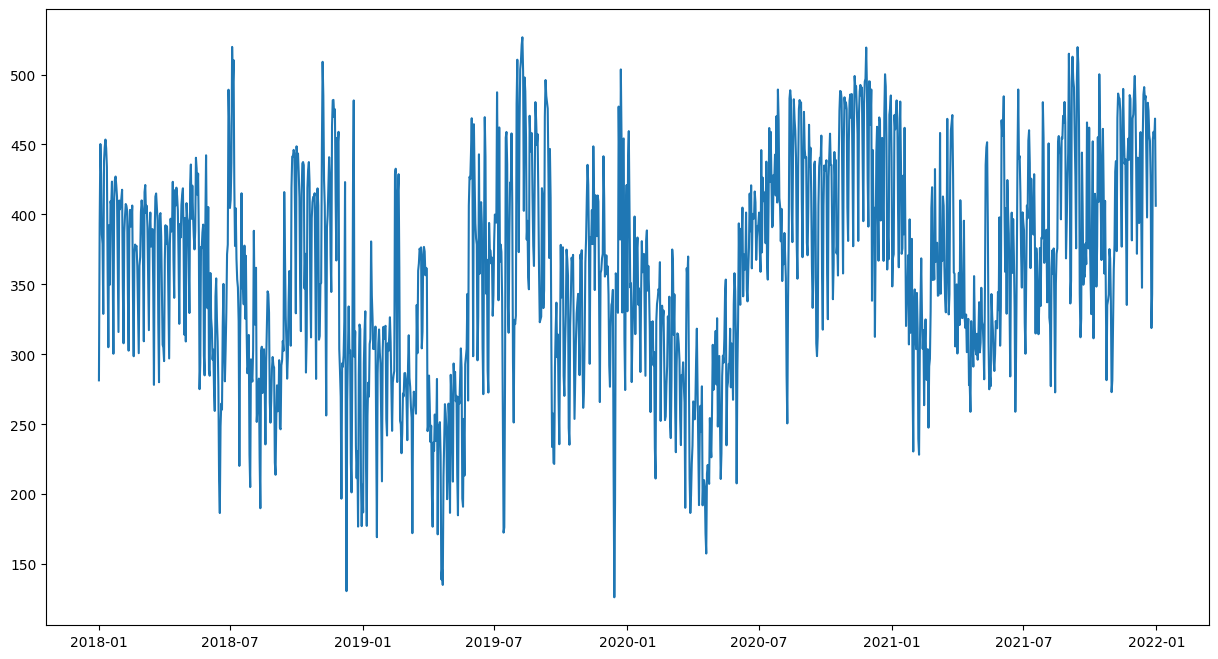

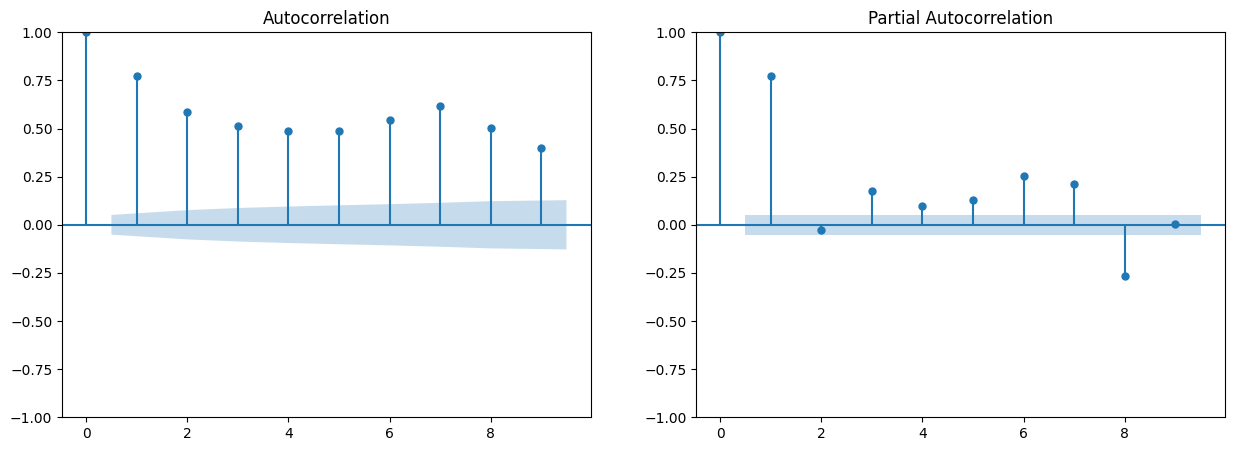

In [15]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.914495
p-value: 0.001931
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

In [19]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_cnavia_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_cnavia_d.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15352.590, Time=11.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15639.715, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15630.598, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15615.344, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15637.719, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15352.084, Time=5.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15376.399, Time=2.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15394.558, Time=2.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15353.108, Time=8.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15351.319, Time=5.00 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=15353.113, Time=8.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=15342.406, Time=19.00 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=29.95 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=15336.291, Time=26.09 sec
 ARIMA(0,1,5)(0,0,0)[

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
modelo_cnavia_d=ARIMA(ys,order=(1,0,8))
m_ad1=modelo_cnavia_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 1960.653413303372
AIC 15242.639768323903
MAPE 0.10365247585068532


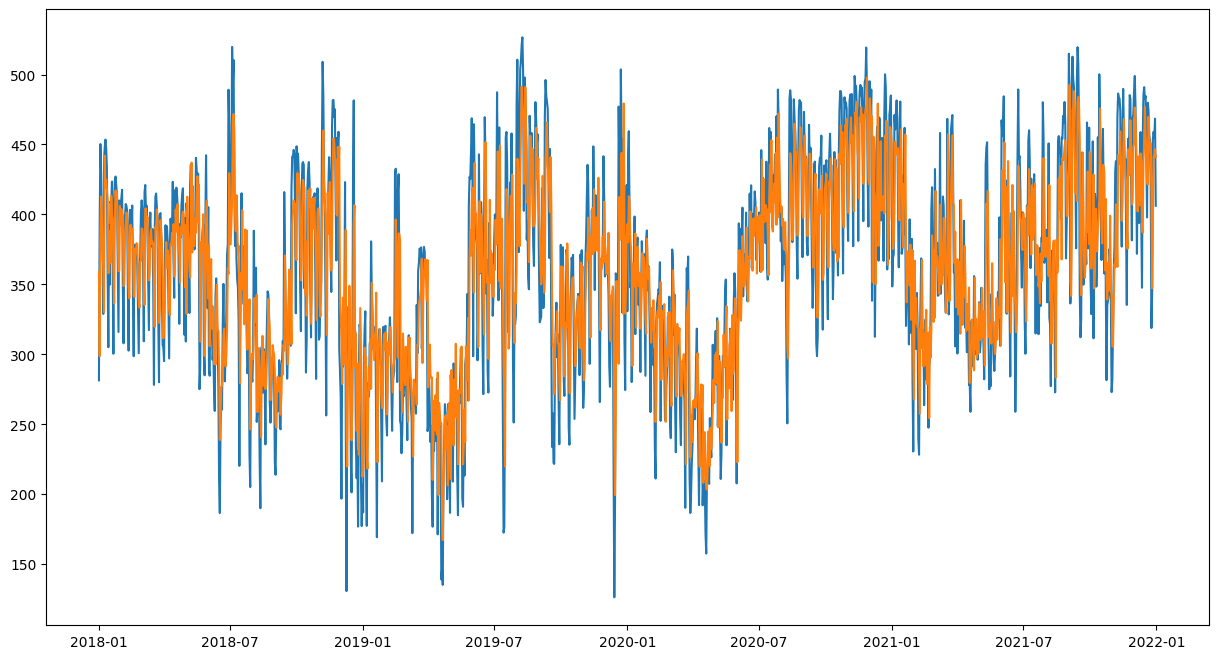

In [21]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

## Modelado Recurrente

In [22]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [23]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [24]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [25]:
seed=29052002
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 131724.1094 - mae: 355.1623 - mape: 98.5805 - mse: 131724.1094
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 115898.8281 - mae: 332.1341 - mape: 91.8571 - mse: 115898.8281
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 100183.1328 - mae: 307.5591 - mape: 84.6827 - mse: 100183.1328
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 84448.3359 - mae: 280.8038 - mape: 76.8711 - mse: 84448.3359
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 68803.8203 - mae: 251.3829 - mape: 68.2791 - mse: 68803.8203
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 53792.4062 - mae: 219.5241 - mape: 58.9992 - mse: 53792.4062
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40049.8320 - mae: 185.8495 - mape: 49.2793 - mse: 40049.8320
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 28223.5996 - mae: 151.7567 - mape: 39.6497 - mse: 28223.5996
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


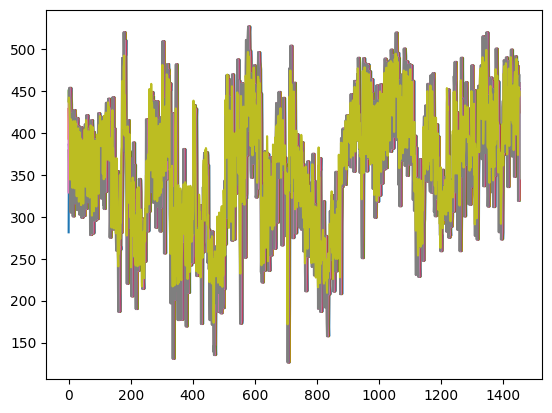

In [28]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [29]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1937.2649 - mae: 33.9619 - mape: 9.9856 - mse: 1937.2649
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1768.0388 - mae: 32.3817 - mape: 9.5599 - mse: 1768.0388
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1658.7159 - mae: 31.3191 - mape: 9.4849 - mse: 1658.7159
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1605.3757 - mae: 30.7618 - mape: 8.9535 - mse: 1605.3757
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1594.3794 - mae: 30.4517 - mape: 9.1709 - mse: 1594.3793
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1534.2660 - mae: 30.0102 - mape: 8.8304 - mse: 1534.2660
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1544.2560 - mae: 30.0013 - mape: 8.8620 - mse: 1544.2560
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1556.0549 - mae: 30.1414 - mape: 9.0157 - mse: 1556.0549
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1487.5717 - mae: 29.32

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


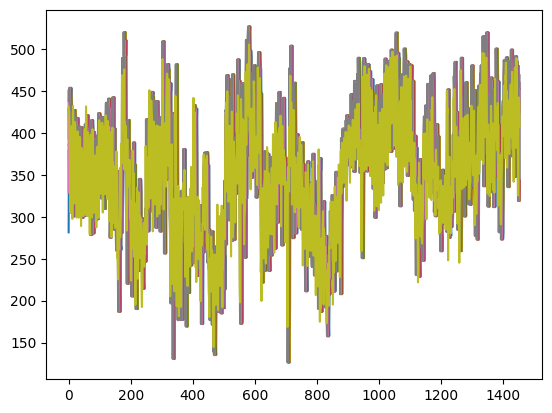

In [30]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
406.68872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
338.4382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
345.02982
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
343.5845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
366.37985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
360.25757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
375.60074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
346.84436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
341.12338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
332.7446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
303.64502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
277.51993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
280.20447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
256.58902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
268.8094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
280.7446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
270.4806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
320.6498
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
295.92923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
353.35406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
273.29547

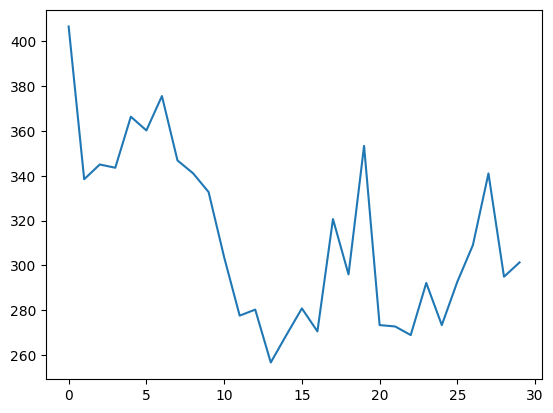

In [31]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

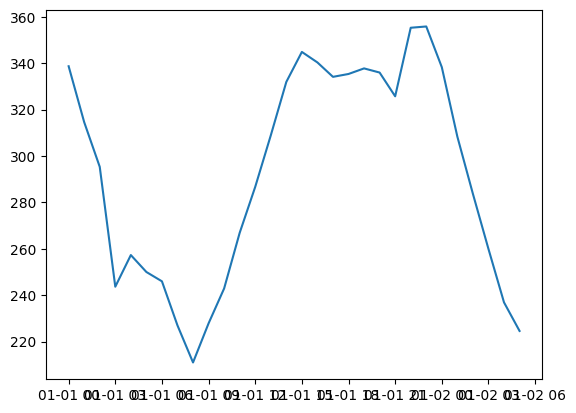

In [32]:
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
plt.plot(xt[:30],yt[:30])

## Modelado MultiHeadAttention

In [33]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [34]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [35]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [36]:
seed=29052002
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
yw[:1]

array([[281.40792375, 392.98805633, 450.31340112, 428.38561325,
        385.79502758, 378.94559804, 328.90279992, 438.01115883]])

In [38]:
np.flip(yw[:1])

array([[438.01115883, 328.90279992, 378.94559804, 385.79502758,
        428.38561325, 450.31340112, 392.98805633, 281.40792375]])

In [39]:
tensor=tf.constant(yw[:1])
tensor

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=
array([[281.40792375, 392.98805633, 450.31340112, 428.38561325,
        385.79502758, 378.94559804, 328.90279992, 438.01115883]])>

In [40]:
import keras
from keras.layers import Lambda
layer = Lambda(lambda x: keras.ops.flip(x))
layer(tensor)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[438.01117, 328.9028 , 378.9456 , 385.795  , 428.38562, 450.31342,
        392.98807, 281.40793]], dtype=float32)>

In [41]:
d=128
input=Input(name="activity",shape=(8,1))
reverse=Lambda(lambda x: keras.ops.flip(x))(input)
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, reverse,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 8, 1)      │          0 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 144541.4688 - mae: 372.4007 - mape: 103.5087 - mse: 144541.4688
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 133599.8281 - mae: 357.9082 - mape: 99.4144 - mse: 133599.8281
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 113338.9375 - mae: 328.6255 - mape: 91.0725 - mse: 113338.9375
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 53049.4336 - mae: 217.2149 - mape: 59.4368 - mse: 53049.4336
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8004.9067 - mae: 71.2533 - mape: 20.8436 - mse: 8004.9067
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19882.7578 - mae: 119.6485 - mape: 35.8859 - mse: 19882.7578
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5067.8120 - mae: 55.4006 - mape: 16.3020 - mse: 5067.8120
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8405.6396 - mae: 76.5305 - mape: 20.8250 - mse: 8405.6396
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


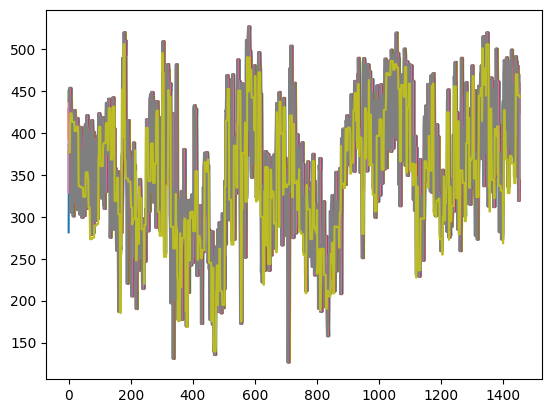

In [43]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [44]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5351.9658 - mae: 56.9073 - mape: 16.7196 - mse: 5351.9658
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4949.5889 - mae: 54.4313 - mape: 15.8905 - mse: 4949.5889
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4545.3887 - mae: 52.2924 - mape: 15.3733 - mse: 4545.3887
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4191.7012 - mae: 50.5640 - mape: 14.9420 - mse: 4191.7012
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4751.4087 - mae: 53.0081 - mape: 15.7502 - mse: 4751.4087
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4717.3604 - mae: 52.7310 - mape: 15.5946 - mse: 4717.3604
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4720.9590 - mae: 52.6727 - mape: 15.6354 - mse: 4720.9590
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4699.0742 - mae: 52.5239 - mape: 15.5763 - mse: 4699.0742
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4698.9395 - ma

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


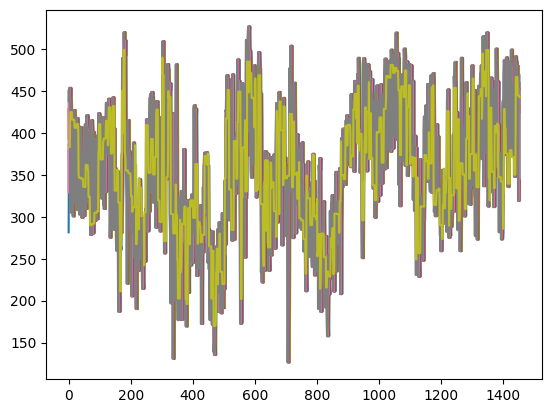

In [45]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

## Modelado Attention

In [46]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [47]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [48]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 137132.8281 - mae: 362.0901 - mape: 100.3943 - mse: 137132.8281
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52635.7266 - mae: 207.0804 - mape: 56.6668 - mse: 52635.7266 
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15355.3730 - mae: 106.8978 - mape: 32.7836 - mse: 15355.3730
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6286.1543 - mae: 67.2769 - mape: 18.1655 - mse: 6286.1543 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


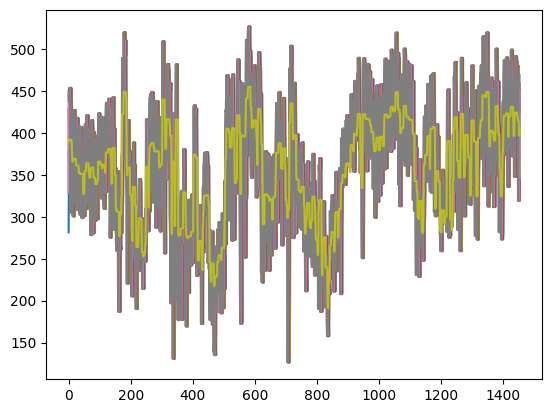

In [50]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [51]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3756.4949 - mae: 48.4212 - mape: 14.6609 - mse: 3756.4949
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3273.9458 - mae: 46.1989 - mape: 13.8229 - mse: 3273.9458 
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3176.8145 - mae: 45.2121 - mape: 13.6661 - mse: 3176.8145 
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3145.5667 - mae: 44.9313 - mape: 13.6158 - mse: 3145.5667 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


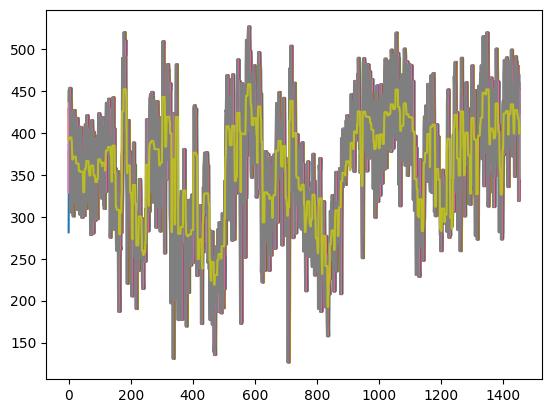

In [52]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)